In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
df = pd.read_csv('Used_Bikes.csv')
df

,Unnamed: 0,bike_name,price,city,kms_driven,owner,age,power,brand
0,0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...,...
32643,32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [69]:
df = pd.read_csv('Used_Bikes.csv')
df.isnull().sum()
# to delete the null values 
df.dropna (inplace=True)
df.isnull().sum()

Unnamed: 0    0
bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [70]:
#
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [71]:
#cat col --- num col # numerical value ko call karta hai
cat_col = df.select_dtypes(include='object')
cat_col.head()

,bike_name,city,owner,brand
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,First Owner,TVS
1,Royal Enfield Classic 350cc,Delhi,First Owner,Royal Enfield
2,Triumph Daytona 675R,Delhi,First Owner,Triumph
3,TVS Apache RTR 180cc,Bangalore,First Owner,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,First Owner,Yamaha


In [72]:
num_col = df.select_dtypes(exclude='object')
num_col.head()  # num value ko call karta hai

,Unnamed: 0,price,kms_driven,age,power
0,0,35000.0,17654.0,3.0,110.0
1,1,119900.0,11000.0,4.0,350.0
2,2,600000.0,110.0,8.0,675.0
3,3,65000.0,16329.0,4.0,180.0
4,4,80000.0,10000.0,3.0,150.0


In [73]:
cat_col = df.drop(["bike_name","city"],axis=1)
cat_col.head()

,Unnamed: 0,price,kms_driven,owner,age,power,brand
0,0,35000.0,17654.0,First Owner,3.0,110.0,TVS
1,1,119900.0,11000.0,First Owner,4.0,350.0,Royal Enfield
2,2,600000.0,110.0,First Owner,8.0,675.0,Triumph
3,3,65000.0,16329.0,First Owner,4.0,180.0,TVS
4,4,80000.0,10000.0,First Owner,3.0,150.0,Yamaha


In [74]:
# cat---> num
# label encoding 
## one hot encoding


In [75]:
## one hot encoding 
pd.get_dummies(cat_col).astype(int).head()

,Unnamed: 0,price,kms_driven,age,power,owner_First Owner,owner_Fourth Owner Or More,owner_Second Owner,owner_Third Owner,brand_BMW,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,0,35000,17654,3,110,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,119900,11000,4,350,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,600000,110,8,675,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,65000,16329,4,180,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,80000,10000,3,150,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
dt = {"First Owner":1,
      "Second Owner":2,
      "Third Owner":3,
      "Fourth Owner or more":4}

In [77]:
cat_col["owner"]=cat_col["owner"].map(dt)

In [78]:
cat_col.head()

,Unnamed: 0,price,kms_driven,owner,age,power,brand
0,0,35000.0,17654.0,1.0,3.0,110.0,TVS
1,1,119900.0,11000.0,1.0,4.0,350.0,Royal Enfield
2,2,600000.0,110.0,1.0,8.0,675.0,Triumph
3,3,65000.0,16329.0,1.0,4.0,180.0,TVS
4,4,80000.0,10000.0,1.0,3.0,150.0,Yamaha


In [79]:
cat_col['brand'].value_counts()

brand
Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
Yezdi                  1
LML                    1
Name: count, dtype: int64

In [80]:
{i : key for key, i in enumerate(cat_col["brand"].unique())}

{'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [81]:
dt1={'TVS': 0,
 'Royal Enfield': 1,
 'Triumph': 2,
 'Yamaha': 3,
 'Honda': 4,
 'Hero': 5,
 'Bajaj': 6,
 'Suzuki': 7,
 'Benelli': 8,
 'KTM': 9,
 'Mahindra': 10,
 'Kawasaki': 11,
 'Ducati': 12,
 'Hyosung': 13,
 'Harley-Davidson': 14,
 'Jawa': 15,
 'BMW': 16,
 'Indian': 17,
 'Rajdoot': 18,
 'LML': 19,
 'Yezdi': 20,
 'MV': 21,
 'Ideal': 22}

In [82]:
cat_col["brand"]=cat_col["brand"].map(dt1)

In [83]:
cat_col.head()

,Unnamed: 0,price,kms_driven,owner,age,power,brand
0,0,35000.0,17654.0,1.0,3.0,110.0,0
1,1,119900.0,11000.0,1.0,4.0,350.0,1
2,2,600000.0,110.0,1.0,8.0,675.0,2
3,3,65000.0,16329.0,1.0,4.0,180.0,0
4,4,80000.0,10000.0,1.0,3.0,150.0,3


In [84]:
final_df =pd.concat([cat_col,num_col],axis=1)
final_df.head()

,Unnamed: 0,price,kms_driven,owner,age,power,brand,Unnamed: 0,price,kms_driven,age,power
0,0,35000.0,17654.0,1.0,3.0,110.0,0,0,35000.0,17654.0,3.0,110.0
1,1,119900.0,11000.0,1.0,4.0,350.0,1,1,119900.0,11000.0,4.0,350.0
2,2,600000.0,110.0,1.0,8.0,675.0,2,2,600000.0,110.0,8.0,675.0
3,3,65000.0,16329.0,1.0,4.0,180.0,0,3,65000.0,16329.0,4.0,180.0
4,4,80000.0,10000.0,1.0,3.0,150.0,3,4,80000.0,10000.0,3.0,150.0


In [85]:
matrix = final_df.corr()
matrix

,Unnamed: 0,price,kms_driven,owner,age,power,brand,Unnamed: 0,price,kms_driven,age,power
Unnamed: 0,1.000000,-0.095040,0.065009,-0.029689,0.180880,-0.057616,0.063245,1.000000,-0.095040,0.065009,0.180880,-0.057616
price,-0.095040,1.000000,-0.313955,-0.040618,-0.399133,0.862376,0.394474,-0.095040,1.000000,-0.313955,-0.399133,0.862376
kms_driven,0.065009,-0.313955,1.000000,-0.014382,0.484684,-0.264016,-0.029519,0.065009,-0.313955,1.000000,0.484684,-0.264016
owner,-0.029689,-0.040618,-0.014382,1.000000,0.291778,0.043454,-0.069956,-0.029689,-0.040618,-0.014382,0.291778,0.043454
age,0.180880,-0.399133,0.484684,0.291778,1.000000,-0.337035,-0.050883,0.180880,-0.399133,0.484684,1.000000,-0.337035
power,-0.057616,0.862376,-0.264016,0.043454,-0.337035,1.000000,0.213429,-0.057616,0.862376,-0.264016,-0.337035,1.000000
brand,0.063245,0.394474,-0.029519,-0.069956,-0.050883,0.213429,1.000000,0.063245,0.394474,-0.029519,-0.050883,0.213429
Unnamed: 0,1.000000,-0.095040,0.065009,-0.029689,0.180880,-0.057616,0.063245,1.000000,-0.095040,0.065009,0.180880,-0.057616
price,-0.095040,1.000000,-0.313955,-0.040618,-0.399133,0.862376,0.394474,-0.095040,1.000000,-0.313955,-0.399133,0.862376
kms_driven,0.065009,-0.313955,1.000000,-0.014382,0.484684,-0.264016,-0.029519,0.065009,-0.313955,1.000000,0.484684,-0.264016


<Axes: >

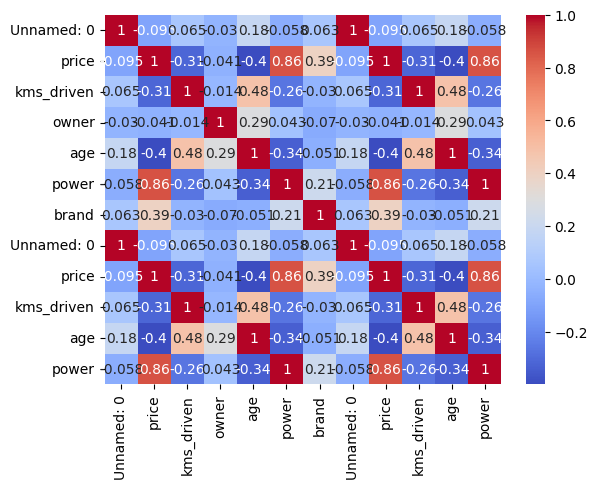

In [87]:
sns.heatmap(matrix,annot=True,cmap= 'coolwarm')

In [1]:
##divide the data into independent and dependent features
x = final_df.drop("price",axis=1)
y = final_df["price"]

NameError: name 'final_df' is not defined

In [89]:
##training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                     test_size=0.2,
                                                       random_state=42)

ModuleNotFoundError: No module named 'sklearn'

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
lr.score(x_train, y_train)


NameError: name 'lr' is not defined

In [ ]:
lr.score(x_test, y_test)

NameError: name 'lr' is not defined